# Fingerprint Liveness Detection VGG16
 (MiniProject TeamNo. M21)

### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4983 images belonging to 9 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4351 images belonging to 9 classes.


## Part 2 - Building the VGG

### Initialising the VGG

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 15 convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [25]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [26]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [27]:
cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))

## Part 3 - Training the VGG

### Compiling the VGG

In [28]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the VGG on the Training set and evaluating it on the Test set

In [29]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
 44/156 [=======>......................] - ETA: 3:39 - loss: 2.0311 - accuracy: 0.2812

KeyboardInterrupt: 

## Part 4 - Making a single prediction

In [171]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/validation/abc.bmp', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
# print(result)

if result[0][2] == 1 or result[0][7]==1:
    prediction = 'It\'s a live Fingerprint'
else:
    print('It\'s a fake Fingerprint\n')
    if result[0][0] == 1:
      prediction = 'Spoofing material: Bodydouble'
    elif result[0][1]:
      prediction = 'Spoofing material: Ecoflex'
    elif result[0][3]:
      prediction = 'Spoofing material: PlayDoh'
    elif result[0][4]:
      prediction = 'Spoofing material: Ecoflex'
    elif result[0][5]:
      prediction = 'Spoofing material: Gelatine'
    elif result[0][6]:
      prediction = 'Spoofing material: Latex'
    elif result[0][8]:
        prediction = 'Spoofing material: WoodGlue'

It's a fake Fingerprint



In [172]:
print(prediction)

Spoofing material: Ecoflex


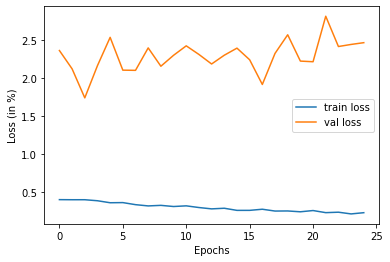

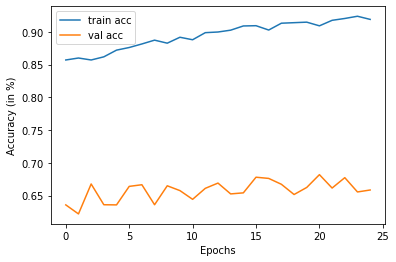

<Figure size 432x288 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (in %)')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [121]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 28800)             0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [26]:
cnn.save("model1_cifar_10epoch.h5")

In [28]:
results={
   0:'Bodydouble',
   1:'Ecoflex',
   2:'Live',
   3:'PlayDoh',
   4:'Ecoflex',
   5:'Gelatine',
   6:'Latex',
   7:'Live',
   8:'WoodGlue',
}